### Install These Libraries

In [ ]:
## This lib is undetected-chromedriver is more robust but for chrome only
## Selenium-stealth only supports Chrome

## --------------------------------------
# !pip install undetected-chromedriver
# !pip install selenium-stealth

## --------------------------------------
# !pip install selenium
# !pip install fake_useragent

### First Implementation

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Initialize EdgeDriver (ensure that the Edge WebDriver is in your PATH or specify its location)
driver = webdriver.Edge()

try:
    # Open Google
    driver.get("https://www.google.com")

    # Locate the search box, enter a query, and press Enter
    search_box = driver.find_element(By.NAME, "q")
    search_box.send_keys("La mejor serie de tv")
    search_box.send_keys(Keys.RETURN)

    # Wait for results to load and be present
    wait = WebDriverWait(driver, 3)  # Wait up to 10 seconds
    results = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'h3')))  # Waiting for <h3> elements

    # Click on the first result link
    first_result_link = results[0].find_element(By.XPATH, './ancestor::a')  # Find the link associated with the first result
    first_result_link.click()  # Click the link

    # Wait for the new page to load
    wait.until(EC.presence_of_element_located((By.TAG_NAME, 'body')))  # Wait until the body of the new page loads

    # Extract data from the new page
    # Example: Extracting the title and some content
    page_title = driver.title  # Get the title of the page
    print("Page Title:", page_title)

    # Example: Extracting a specific element by CSS selector
    # Adjust the selector based on the structure of the new page
    content_element = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.content')))  # Change 'div.content' to the actual selector
    content_text = content_element.text  # Extract the text from the element
    print("Content Extracted:", content_text)

    time.sleep(10)  # Keep the browser open for 100 seconds to view results

finally:
    # Close the driver
    driver.quit()

---
### Important Steps to Make your Bot Undetectable

1. **Set an User Agent**
2. **Undetected_chromedriver**: remove certain indicators that Selenium WebDriver is being used
3. **Rotating User Agent**: hanging the user agent for each request, making your bot appear as though it’s a new browser session or device with each action

    * `fake_useragent`: python library to rotate user agents
4. Set delay, random clicks and scrolling to simulate and user interaction

---

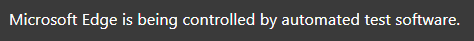

This notification doesn’t mean that websites can detect that your browser is automated. It’s simply a visual banner displayed by the browser itself when it is launched via WebDriver for automation purposes.

---

In [ ]:
import random
import time
from selenium import webdriver
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from fake_useragent import UserAgent

# Initialize a UserAgent instance for rotating user agents
ua = UserAgent()

# Function to add random delay
def random_delay(min_seconds=1, max_seconds=3):
    time.sleep(random.uniform(min_seconds, max_seconds))

# Randomly select a user agent
user_agent = ua.random
print("Using User-Agent:", user_agent)

# Set up Edge options with the random user agent
options = Options()
options.add_argument(f"user-agent={user_agent}")
options.add_argument("--disable-blink-features=AutomationControlled")

# Specify the Edge binary location
options.binary_location = "C:\\Program Files (x86)\\Microsoft\\Edge\\Application\\msedge.exe"  # Adjust path as needed

# Initialize Edge WebDriver with options
driver = webdriver.Edge(options=options)

try:
    # Open Google with a delay
    driver.get("https://www.google.com")
    random_delay(2, 4)

    # Locate the search box, enter a query, and press Enter
    search_box = driver.find_element(By.NAME, "q")
    random_delay(1, 2)
    search_box.send_keys("Best TV series")
    random_delay(1, 2)
    search_box.send_keys(Keys.RETURN)

    # Wait for results to load and be present
    wait = WebDriverWait(driver, 10)
    results = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'h3')))
    random_delay(2, 5)

    # Print all results with delay
    for result in results:
        print(result.text)
        random_delay(0.5, 1)

    # Click on the first result link with delay
    first_result_link = results[0].find_element(By.XPATH, './ancestor::a')
    random_delay(1, 3)
    first_result_link.click()

    # Wait for the new page to load
    wait.until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    random_delay(2, 5)

    # Optionally, you can do something on the new page
    print("Navigated to the page:", driver.current_url)

    time.sleep(10)  # Keep the browser open for 10 seconds to view results

finally:
    # Close the driver
    driver.quit()


In [ ]:
import random
import time
from selenium import webdriver
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from fake_useragent import UserAgent

# Initialize a UserAgent instance for rotating user agents
ua = UserAgent()

# Function to add random delay
def random_delay(min_seconds=1, max_seconds=3):
    time.sleep(random.uniform(min_seconds, max_seconds))

# Randomly select a user agent
user_agent = ua.random
print("Using User-Agent:", user_agent)

# Set up Edge options with the random user agent
options = Options()
options.add_argument(f"user-agent={user_agent}")
options.add_argument("--disable-blink-features=AutomationControlled")
options.binary_location = "C:\\Program Files (x86)\\Microsoft\\Edge\\Application\\msedge.exe"  # Adjust path as needed

# Initialize Edge WebDriver with options
driver = webdriver.Edge(options=options)

# Inject JavaScript to hide Selenium properties and other stealth techniques
driver.execute_script("""
    Object.defineProperty(navigator, 'webdriver', {get: () => undefined});
    window.navigator.chrome = {
        runtime: {},
    };
    Object.defineProperty(navigator, 'languages', {get: () => ['en-US', 'en']});
    Object.defineProperty(navigator, 'platform', {get: () => 'Win32'});
    Object.defineProperty(navigator, 'vendor', {get: () => 'Google Inc.'});
""")

try:
    # Open Google with a delay
    driver.get("https://www.google.com")
    random_delay(2, 4)

    # Locate the search box, enter a query, and press Enter
    search_box = driver.find_element(By.NAME, "q")
    random_delay(1, 2)
    search_box.send_keys("Best TV series")
    random_delay(1, 2)
    search_box.send_keys(Keys.RETURN)

    # Wait for results to load and be present
    wait = WebDriverWait(driver, 10)
    results = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'h3')))
    random_delay(2, 5)

    # Print all results with delay
    for result in results:
        print(result.text)
        random_delay(0.5, 1)

    # Click on the first result link with delay
    first_result_link = results[0].find_element(By.XPATH, './ancestor::a')
    random_delay(1, 3)
    first_result_link.click()

    # Wait for the new page to load
    wait.until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    random_delay(2, 5)

    # Optionally, you can do something on the new page
    print("Navigated to the page:", driver.current_url)

    time.sleep(10)  # Keep the browser open for 10 seconds to view results

finally:
    # Close the driver
    driver.quit()
